# [安裝anaconda](https://yaojenkuo.io/intro_2_py_ds_esun/chapter0.slides.html#/)



## [jupyter notebook快捷鍵](http://opus.konghy.cn/ipynb/jupyter-notebook-keyboard-shortcut.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## [申請Kaggle帳號](https://www.kaggle.com/)

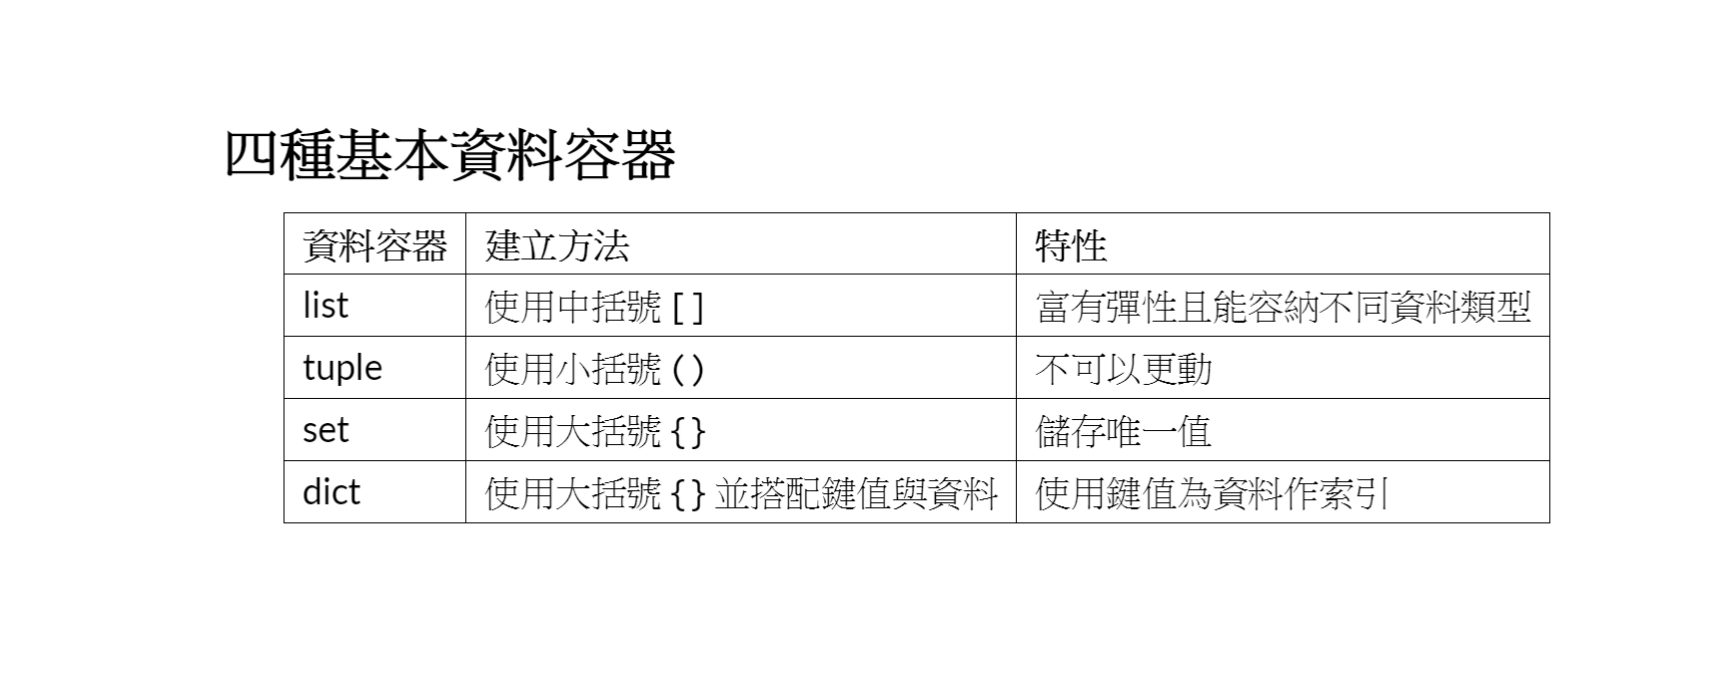

## List沒辦法處理element-wise資料
## 透過pandas或numpy.array

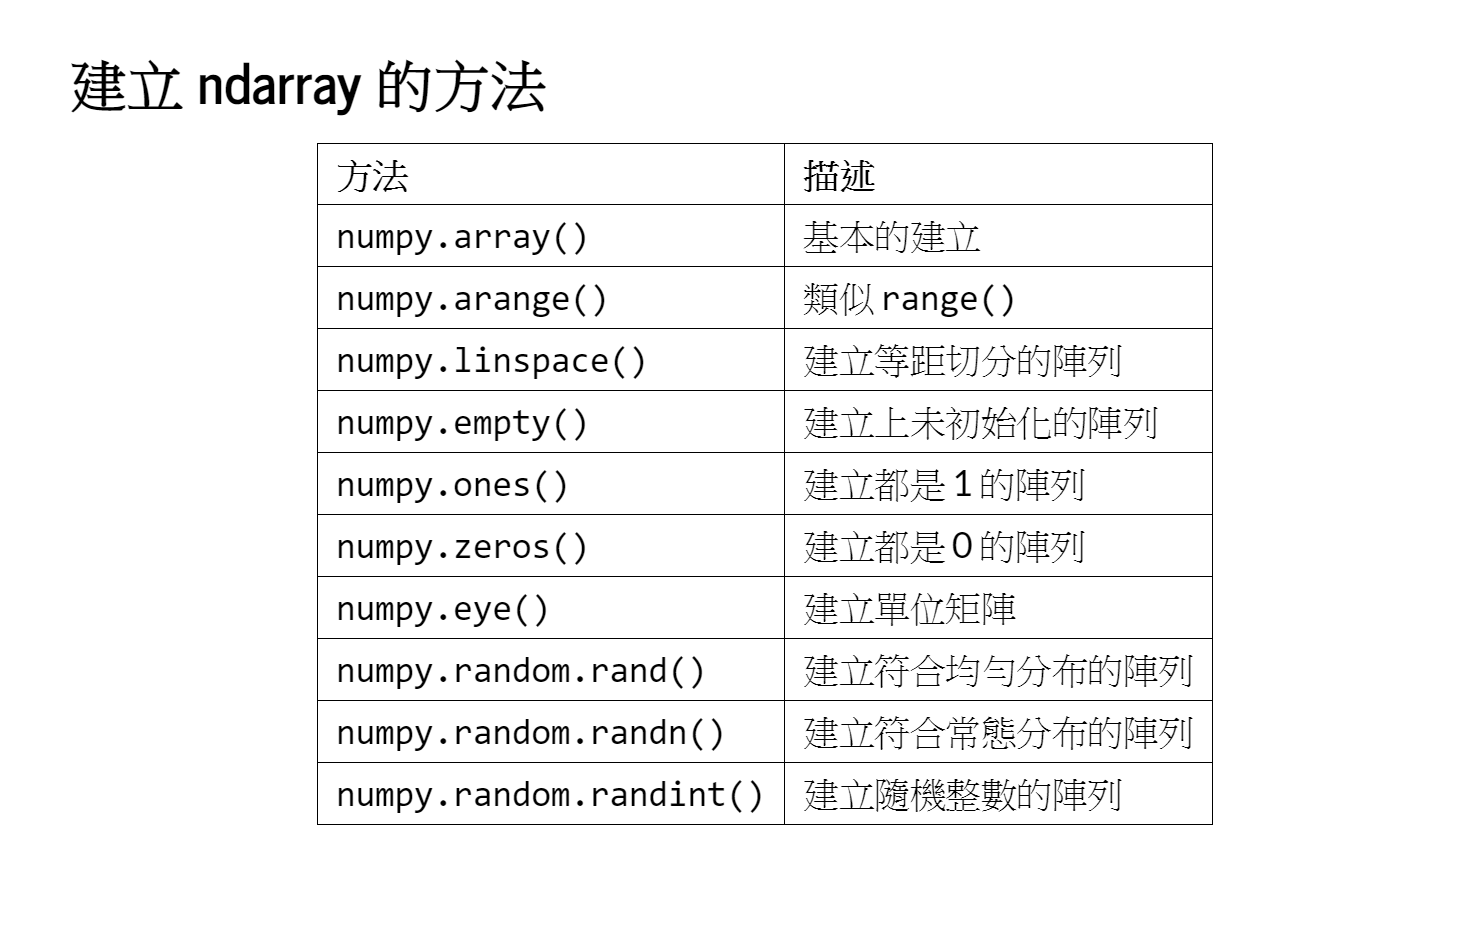

## dropna()、fillna()
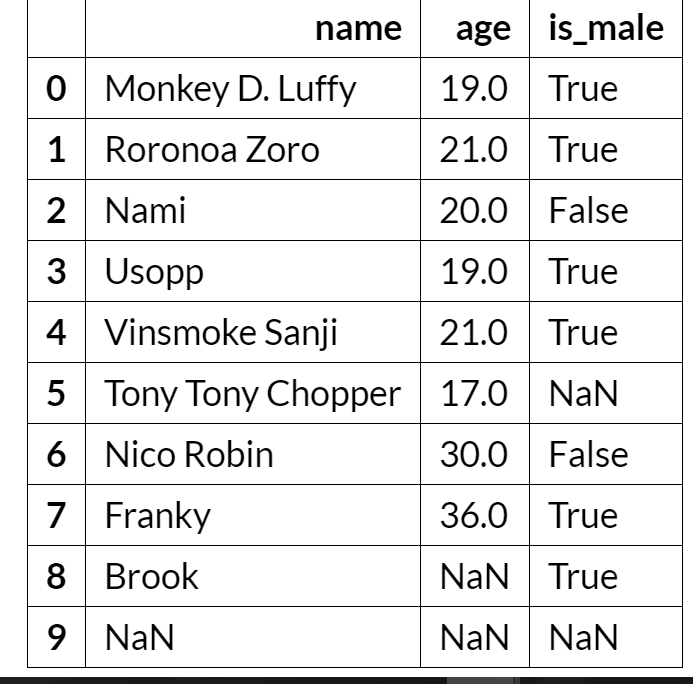
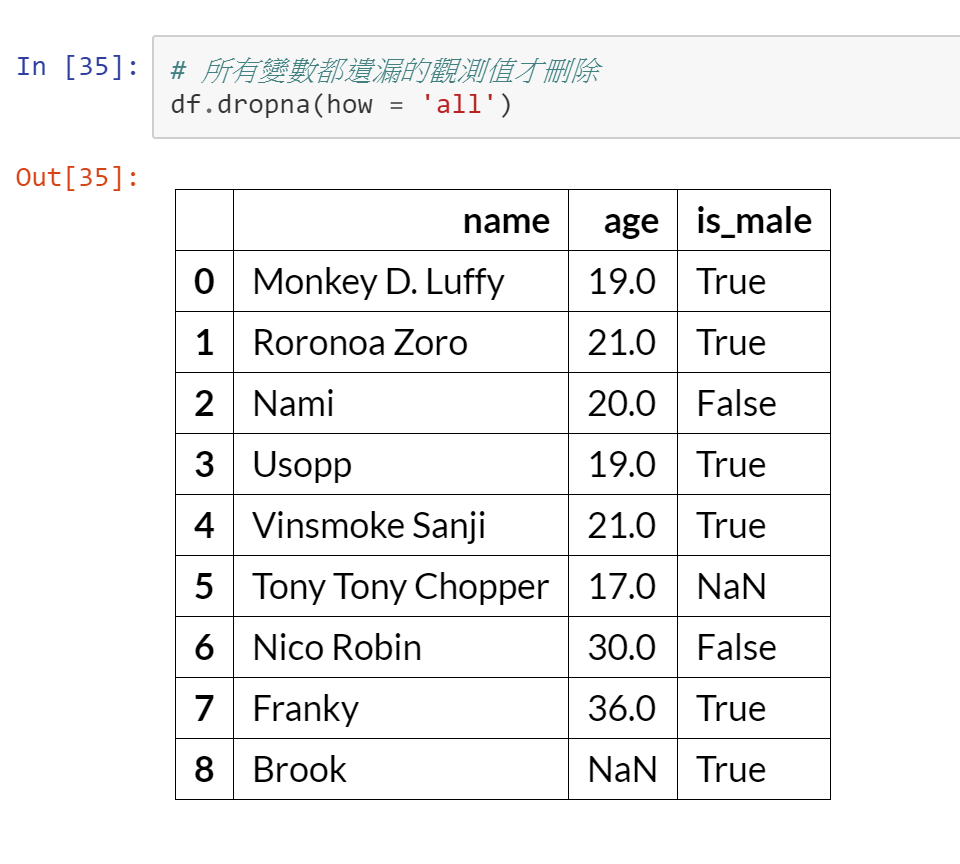
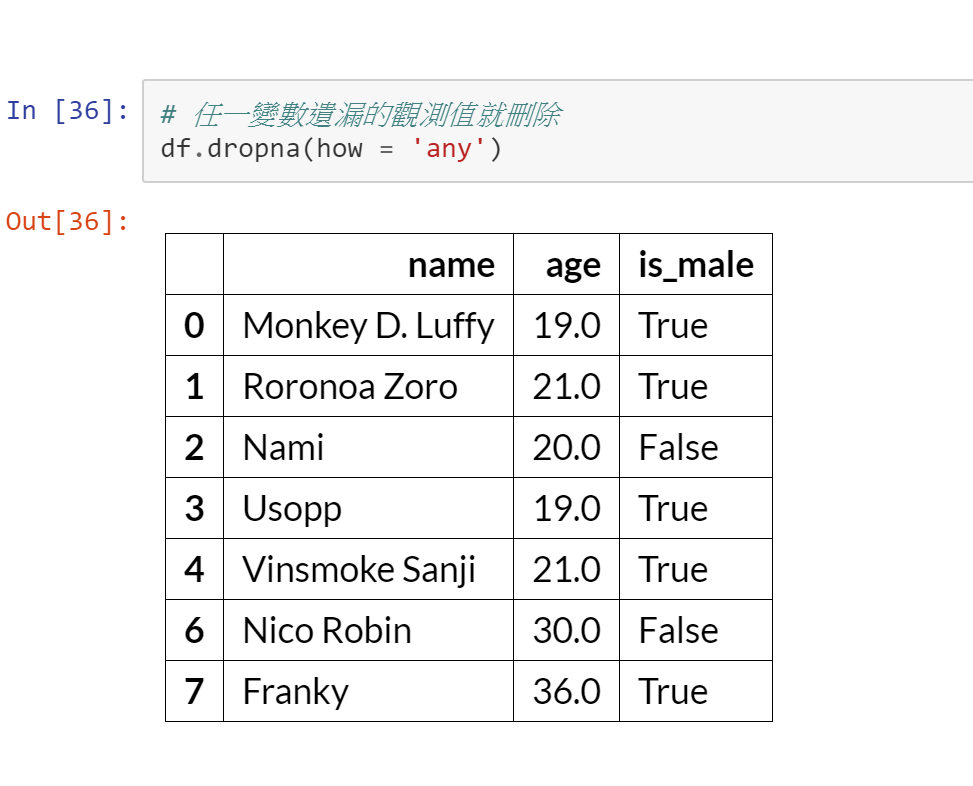
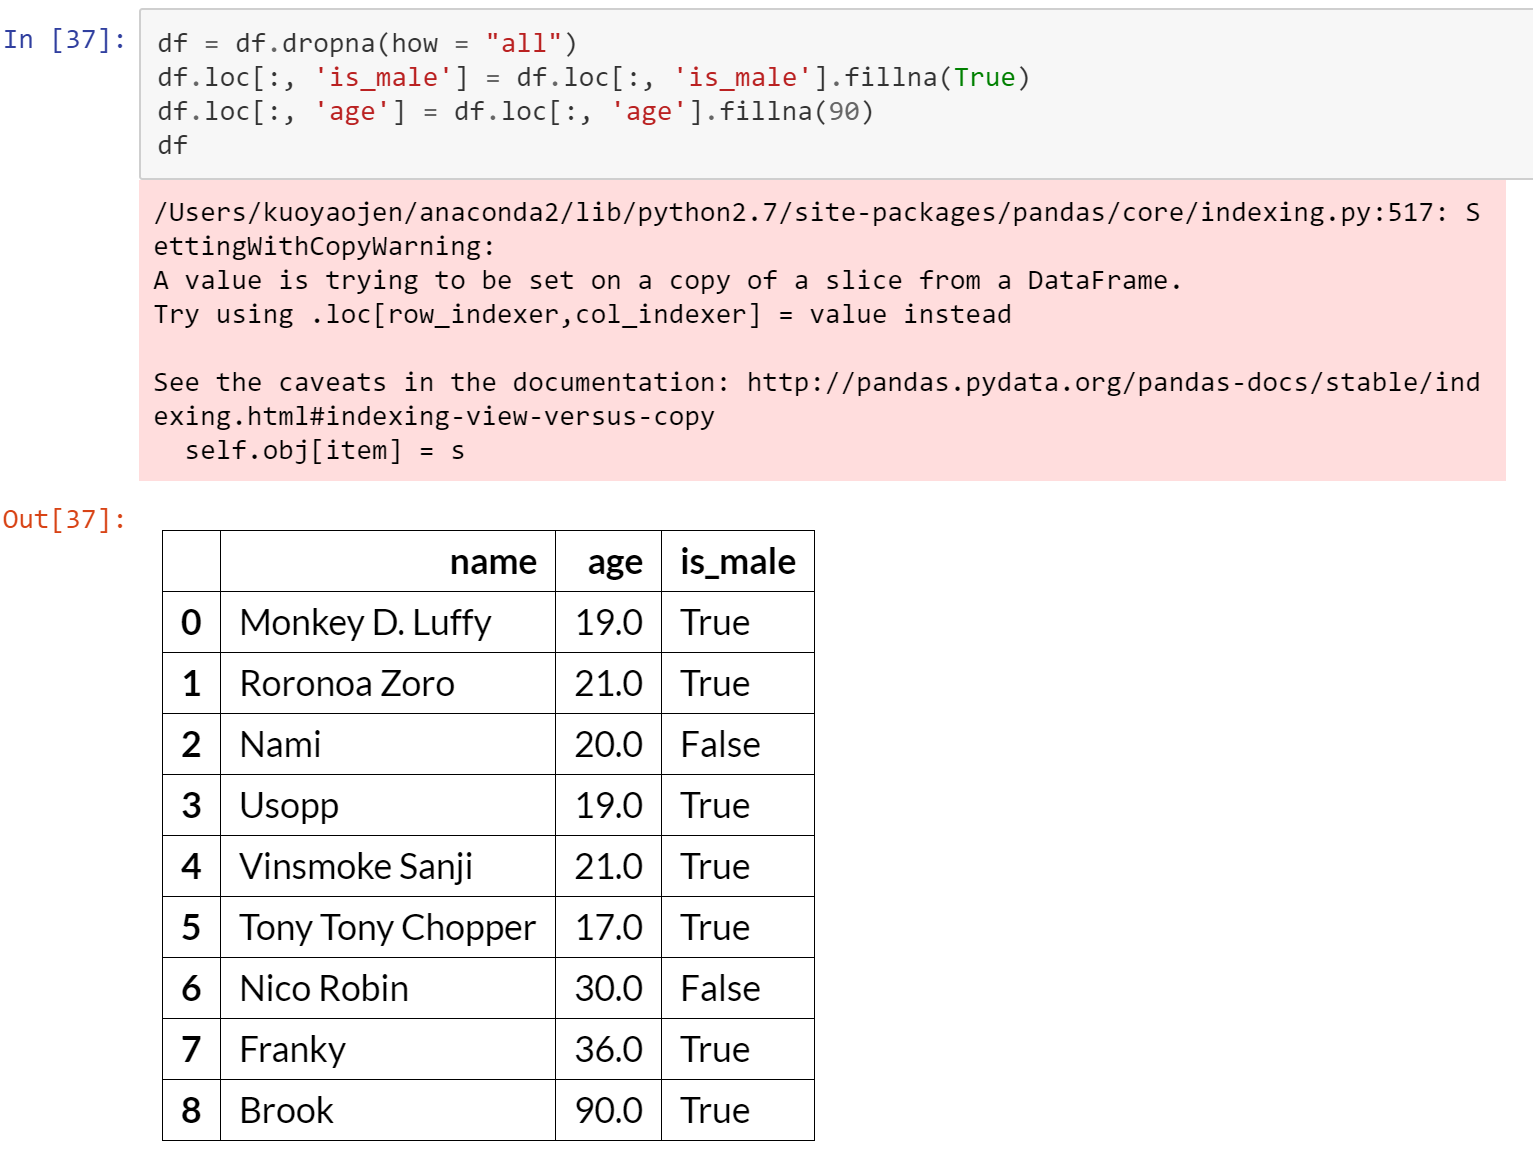

## https://pandas.pydata.org/pandas-docs/stable/index.html

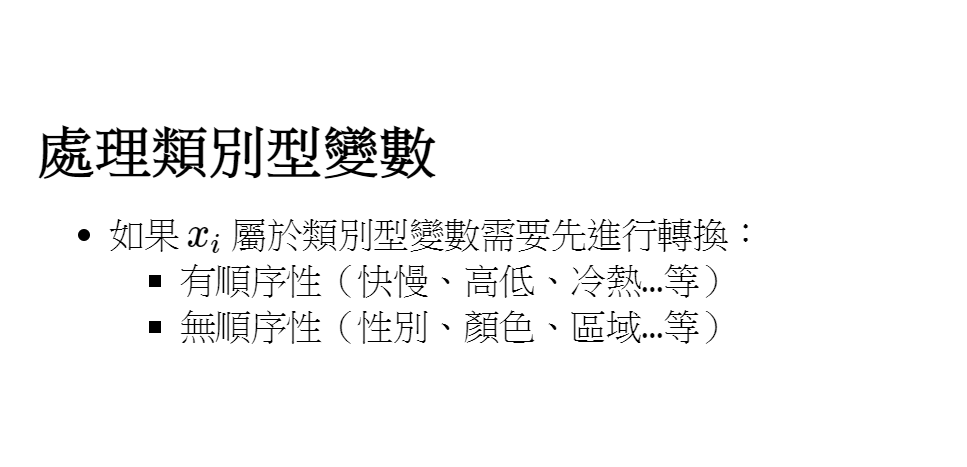
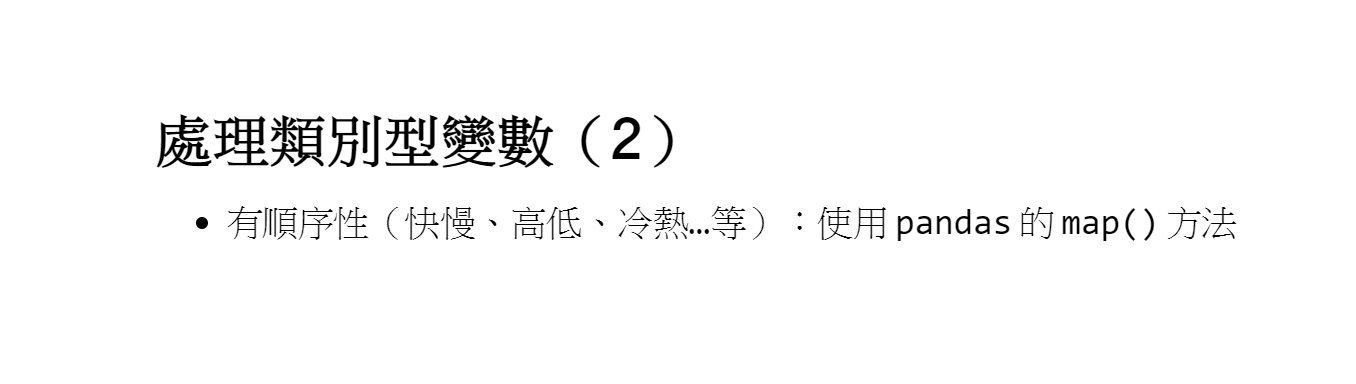
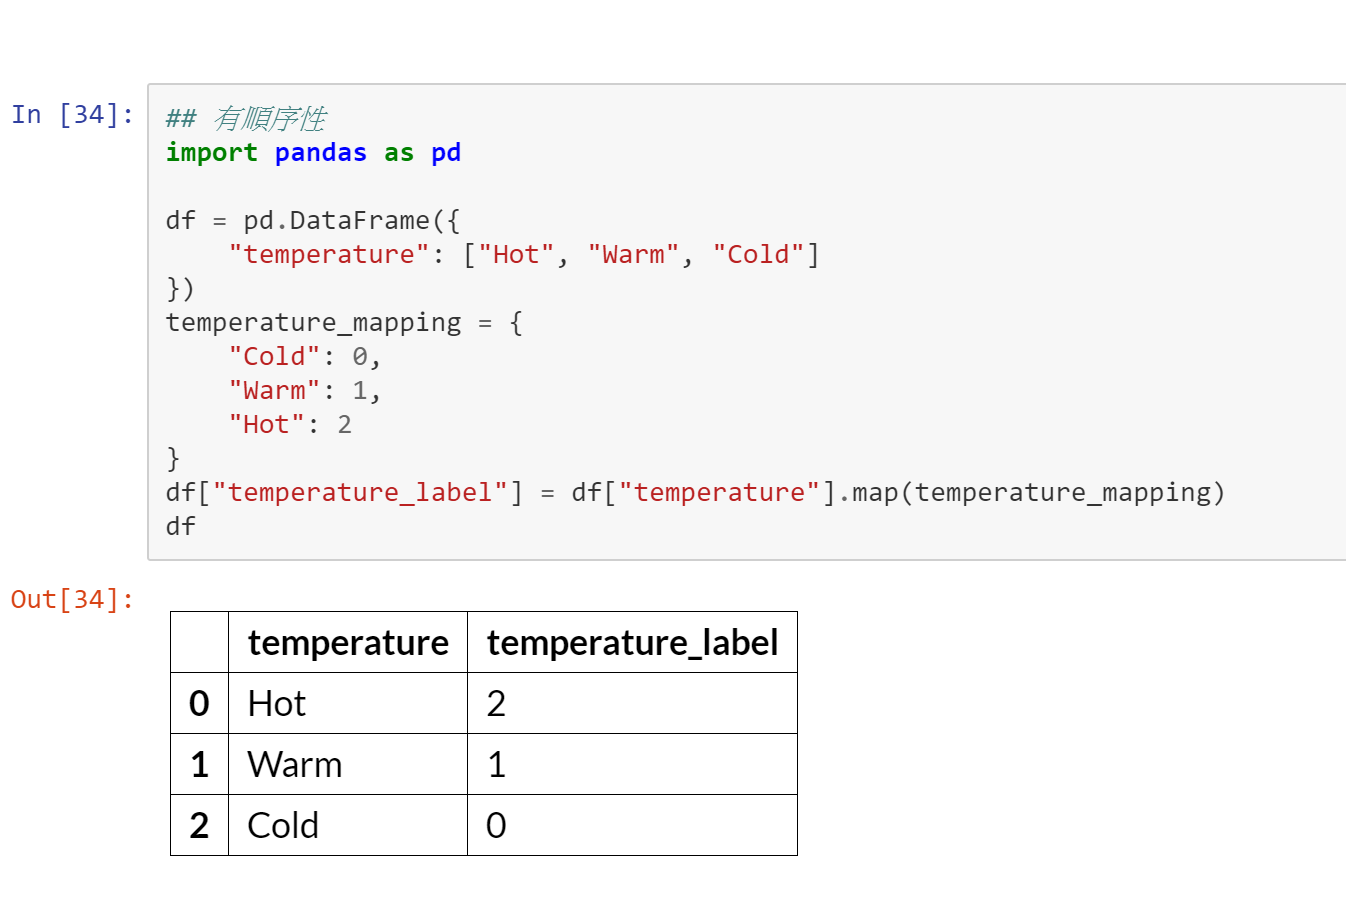
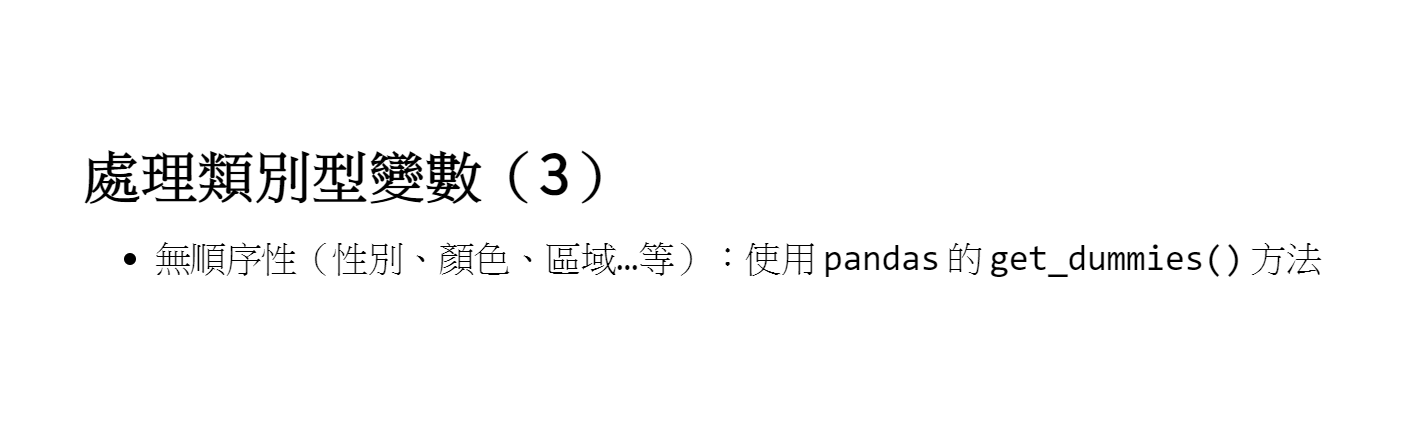
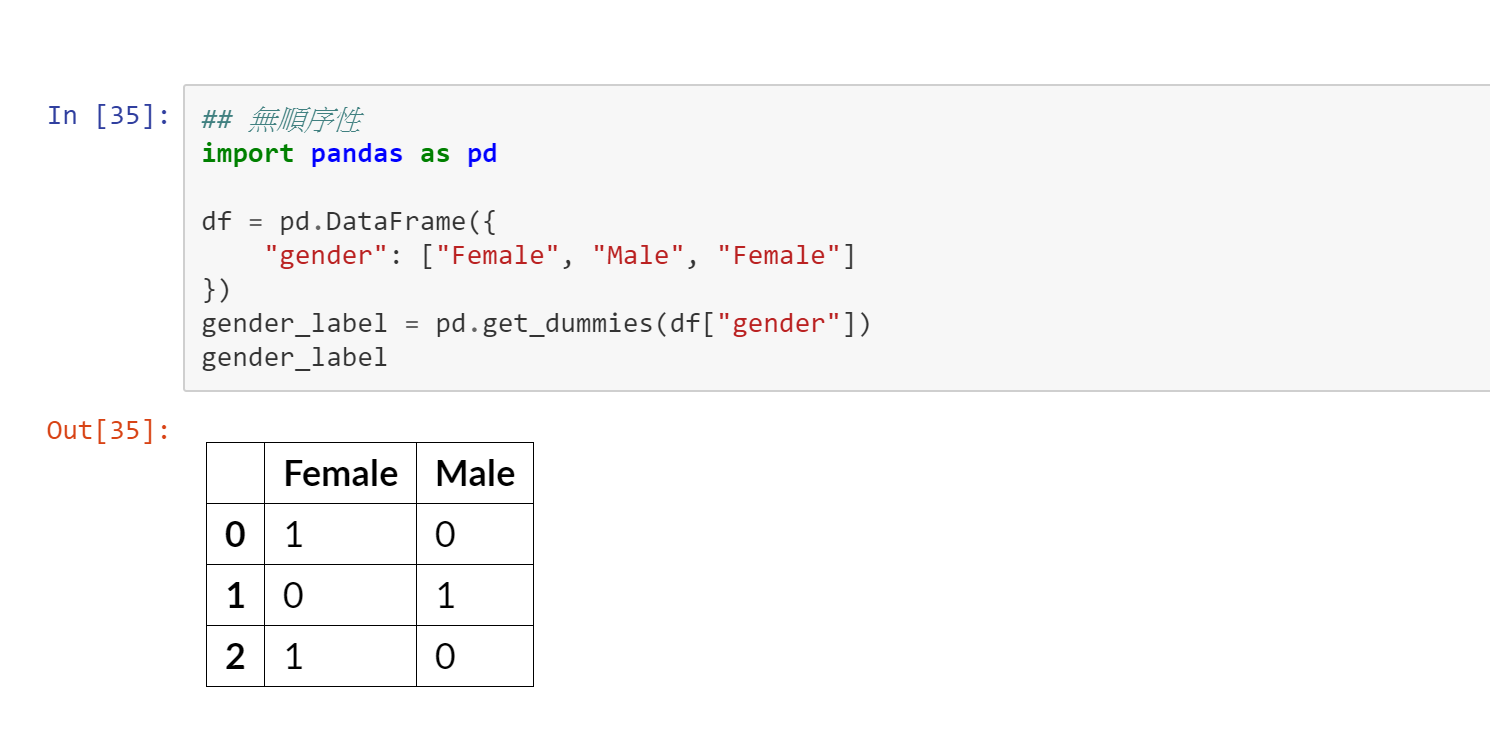

## 讀資料
* [pandas](https://yaojenkuo.io/intro_2_py_ds_esun/chapter4.slides.html#/12)
* 讀sas資料 read_sas，但建議轉換成[csv檔](https://stackoverflow.com/questions/48170960/why-is-pandas-read-sas-so-much-slower-than-pandas-read-csv)後再讀入

## [Titanic：Machine Learning from Disater](https://www.kaggle.com/c/titanic)

In [24]:
#讀資料
train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
#看資料
print train.head(3)
print train.shape
#事件發生比例與數量
print train.Survived.value_counts(normalize=False)
print train.Survived.value_counts(normalize=True)
#遺漏值件數
print train.isnull().sum()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
(891, 12)
0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked 

In [25]:
#變數分布
print train.agg(['mean','median','max','min'])
print train.quantile(.25)
print train.groupby('Survived').agg(['count','mean','median','max','min'])

        PassengerId  Survived    Pclass                         Name     Sex  \
max           891.0  1.000000  3.000000  van Melkebeke, Mr. Philemon    male   
mean          446.0  0.383838  2.308642                          NaN     NaN   
median        446.0  0.000000  3.000000                          NaN     NaN   
min             1.0  0.000000  1.000000          Abbing, Mr. Anthony  female   

              Age     SibSp     Parch     Ticket        Fare Cabin Embarked  
max     80.000000  8.000000  6.000000  WE/P 5735  512.329200     T        S  
mean    29.699118  0.523008  0.381594        NaN   32.204208   NaN      NaN  
median  28.000000  0.000000  0.000000        NaN   14.454200   NaN      NaN  
min      0.420000  0.000000  0.000000     110152    0.000000   inf      inf  
PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64
         Passe

In [26]:
#補值
print train.Survived.isnull().sum()
print train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False)
print "\n"
print train.Survived[train.Sex == 'male'].value_counts(normalize = False, sort = False)
print train.Survived.value_counts(normalize = False, sort = False)
print "\n"
print train.Embarked.value_counts(normalize = False, sort = False)
print train.Embarked.value_counts(normalize = False, sort = False,dropna=False)


0
0    0.811092
1    0.188908
Name: Survived, dtype: float64


0    468
1    109
Name: Survived, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


C    168
Q     77
S    644
Name: Embarked, dtype: int64
NaN      2
C      168
Q       77
S      644
Name: Embarked, dtype: int64


In [27]:
print train.Embarked.value_counts()
most_embarked = train.Embarked.value_counts().index[0]
print most_embarked
train.Embarked = train.Embarked.fillna(most_embarked)
print sum(train.Embarked.isnull())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S
0


In [28]:
age_median = train.Age.median()
print sum(train.Age.isnull())
train.Age = train.Age.fillna(age_median)
print sum(train.Age.isnull())

177
0


In [37]:
#變數轉換 one-hot encodeing
train_sex_embarked_dummies = pd.get_dummies(train.loc[:, ["Sex", "Embarked"]])
print train_sex_embarked_dummies.head(3)

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0         1           0           0           1
1           1         0           1           0           0
2           1         0           0           0           1


In [38]:
train_dummies=pd.get_dummies(train)
print train_dummies.head(3)

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)     ...      Cabin_F G73  Cabin_F2  \
0                                      0     ...                0         0   
1                                      0     ...                0         0   
2                                      0     ...                0         0   

   Cabin_F33  Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  Embarked_Q  \
0          0          0         0         0        0           0           0   
1

In [53]:
train_drop=train.copy()
train_drop.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
print train_drop.head(3)

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S


In [54]:
train_drop_dummies=pd.get_dummies(train_drop)
print train_drop_dummies.head(3)

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500           0   
1            2         1       1  38.0      1      0  71.2833           1   
2            3         1       3  26.0      0      0   7.9250           1   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  
2         0           0           0           1  


In [55]:
# 整理 features 跟 target
train_features = train_drop_dummies.copy()
train_features.drop(['Survived'],axis=1,inplace=True)
print train_features.head(3)

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0            1       3  22.0      1      0   7.2500           0         1   
1            2       1  38.0      1      0  71.2833           1         0   
2            3       3  26.0      0      0   7.9250           1         0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  


In [56]:
target=train_drop_dummies.Survived.values
print target

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

## [Partition](https://yaojenkuo.io/intro_2_py_ds_esun/chapter7.slides.html#/6/5)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, target, test_size = 0.3)

## [決策樹](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [79]:
from sklearn import tree
# 建立模型
# random_state確保每次跑的結果是一樣的
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=87, splitter='best')

## [評估指標](https://yaojenkuo.io/intro_2_py_ds_esun/chapter7.slides.html#/7)
* [F1 Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
* [Recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* [ROC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [89]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
predictions_tree_train = tree_clf.predict(X_train)
predictions_tree_test = tree_clf.predict(X_test)
f1_train = f1_score(y_train, predictions_tree_train)
f1_test = f1_score(y_test, predictions_tree_test)
recall_train = recall_score(y_train, predictions_tree_train)
recall_test = recall_score(y_test, predictions_tree_test)
roc_train = roc_auc_score(y_train, predictions_tree_train)
roc_test = roc_auc_score(y_test, predictions_tree_test)

print f1_train
print f1_test
print recall_train
print recall_test
print roc_train
print roc_test

1.0
0.646464646465
1.0
0.659793814433
1.0
0.721709772714


## [羅輯斯迴歸](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [88]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=99)
LR_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=99, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## [SVM](http://scikit-learn.org/stable/modules/svm.html)
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [90]:
from sklearn.svm import SVC

# 建立模型
svm_clf = SVC(kernel = 'linear', random_state = 87)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=87, shrinking=True,
  tol=0.001, verbose=False)

## [隨機森林](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [91]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
forest_clf = RandomForestClassifier(max_depth = 10, min_samples_split = 5, n_estimators = 100,\
                                    random_state = 87, criterion = 'entropy')
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=87,
            verbose=0, warm_start=False)

## Ensemble
* [多數決](https://yaojenkuo.io/intro_2_py_ds_esun/chapter7.slides.html#/10/2)
* [VotingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [94]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('tree', tree_clf), ('LR', LR_clf), ('svc', svm_clf),\
                                    ('forest',forest_clf)])
eclf.fit(X_train, y_train)
predictions_eclf_train = eclf.predict(X_train)
predictions_eclf_test = eclf.predict(X_test)
f1_train = f1_score(y_train, predictions_eclf_train)
f1_test = f1_score(y_test, predictions_eclf_test)
recall_train = recall_score(y_train, predictions_eclf_train)
recall_test = recall_score(y_test, predictions_eclf_test)
roc_train = roc_auc_score(y_train, predictions_eclf_train)
roc_test = roc_auc_score(y_test, predictions_eclf_test)
print f1_train
print f1_test
print recall_train
print recall_test
print roc_train
print roc_test

0.815850815851
0.689655172414
0.714285714286
0.618556701031
0.845238095238
0.759570748176


In [48]:
test_url = "https://storage.googleapis.com/py_ml_datasets/test.csv"
test = pd.read_csv(test_url)
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [50]:
print test.shape
print test.isnull().sum()

(418, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [51]:
# Age 的遺漏值以中位數填補
age_median = test.Age.median()
test.Age = test.Age.fillna(age_median)
print sum(test.Age.isnull())

# Fare 的遺漏值以平均數填補
fare_median = test.Fare.median()
test.Fare = test.Fare.fillna(fare_median)
print sum(test.Fare.isnull())

0
0


In [95]:
test_drop=test.copy()
test_drop.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
test_drop_dummies=pd.get_dummies(test_drop)
test_features = test_drop_dummies.copy()

# 預估
predictions = eclf.predict(test_features)
print predictions

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [96]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId,columns = ["Survived"])
print my_solution.head()
print my_solution.shape
my_solution.to_csv("test.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         0
895         0
896         0
(418, 1)


In [10]:
%pwd

u'C:\\Users\\typhone'

In [2]:
import pandas_datareader as pdr

In [5]:
%time df=pdr.get_data_yahoo('AAPL')

Wall time: 1.55 s


In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,20.301006,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,20.616993,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,20.652637,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,20.324135,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,20.286560,119282800


In [13]:
df[-300:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-27,143.919998,144.160004,143.309998,143.789993,141.007004,14246300
2017-04-28,144.089996,144.300003,143.270004,143.649994,140.869705,20860400
2017-05-01,145.100006,147.199997,144.960007,146.580002,143.743011,33602900
2017-05-02,147.539993,148.089996,146.839996,147.509995,144.654999,45352200
2017-05-03,145.589996,147.490005,144.270004,147.059998,144.213715,45697000
2017-05-04,146.520004,147.139999,145.809998,146.529999,143.693954,23371900
2017-05-05,146.759995,148.979996,146.759995,148.960007,146.076935,27327700
2017-05-08,149.029999,153.699997,149.029999,153.009995,150.048538,48752400
2017-05-09,153.869995,154.880005,153.449997,153.990005,151.009598,39130400


## Quandl https://www.quandl.com/tools/python